In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [2]:
dataload = "/content/drive/My Drive/PAD/Data01/data_10.json"

In [3]:
# Funcion para cargar los datos del archivo json
def load_data(dataload):

    with open(dataload, "r") as f: #
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

X,y = load_data(dataload)
X.shape


Data succesfully loaded!


(9996, 130, 13)

In [4]:
# Configuramos la division test y entrenamiento. con 30% de los datos para testeo. 
X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.3)

In [5]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape

input_shape = (X_train.shape[1], X_train.shape[2], 1)

# build the CNN - model
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#1 flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))
#2 flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [7]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

El umero de muestras para el entrenamiento =30.
El modelo se actualiza cada vez que se procesa un lote, lo que significa que se puede actualizar varias veces durante una época. 
Si batch_sizese establece igual a la longitud de x, el modelo se actualizará una vez por época.


In [8]:
X_train.shape

(5997, 130, 13, 1)

In [9]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=40, epochs=100)

Epoch 1/100
150/150 [==============================] - 4s 9ms/step - loss: 2.3806 - accuracy: 0.2103 - val_loss: 1.8985 - val_accuracy: 0.3533
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 1.9271 - accuracy: 0.3243 - val_loss: 1.6121 - val_accuracy: 0.4440
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 1.7547 - accuracy: 0.3759 - val_loss: 1.4723 - val_accuracy: 0.4807
Epoch 4/100
150/150 [==============================] - 1s 6ms/step - loss: 1.6351 - accuracy: 0.4072 - val_loss: 1.3849 - val_accuracy: 0.5100
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 1.5488 - accuracy: 0.4466 - val_loss: 1.3171 - val_accuracy: 0.5180
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 1.4804 - accuracy: 0.4692 - val_loss: 1.2751 - val_accuracy: 0.5353
Epoch 7/100
150/150 [==============================] - 1s 6ms/step - loss: 1.4209 - accuracy: 0.4886 - val_loss: 1.2351 - val_accuracy: 0.5533

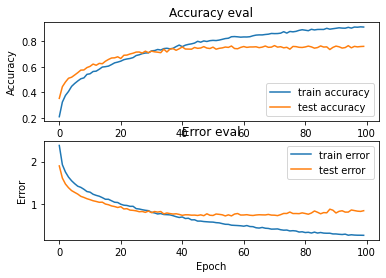

In [10]:
# plot accuracy and error as a function of the epochs

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

plot_history(history)

In [11]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.8929 - accuracy: 0.7515 - 334ms/epoch - 4ms/step

Test accuracy: 0.7515006065368652


In [12]:
# Es hora de guardar nuestro modelo de Red CNN:
model_cnn.save("Detector_Generos_13_CNN")
model_cnn.save("Detector_Generos_13_CNN.h5")


## Test de Predicción:



In [13]:
# pick a sample to predict from the test set
X_to_predict = X_test[200]
y_to_predict = y_test[200]

print("Real Genre:", y_to_predict)

# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)
X_to_predict.shape
# perform prediction
prediction = model_cnn.predict(X_to_predict)

Real Genre: 6
1/1 [==============================] - 0s 180ms/step


In [14]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 6


In [15]:
# pick a sample to predict from the test set
X_to_predict = X_test[220]
y_to_predict = y_test[220]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 7
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 6


In [16]:
# Opening JSON file
f = open("/content/drive/My Drive/PAD/Data01/data_10.json")
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
for i in data['mapping']:
    print(i)
  
# Closing file
f.close()

rock
reggae
pop
metal
jazz
hiphop
disco
country
classical
blues


In [17]:
# Hacemos una preba con 10 predicciones para testear la precicion de nuestro modelo:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))



Real Genre: 2
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 2

Real Genre: 8
1/1 [==============================] - 0s 17ms/step
Predicted Genre: 8

Real Genre: 8
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 8

Real Genre: 7
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 7

Real Genre: 4
1/1 [==============================] - 0s 16ms/step
Predicted Genre: 4

Real Genre: 1
1/1 [==============================] - 0s 18ms/step
Predicted Genre: 5

Real Genre: 4
1/1 [==============================] - 0s 16ms/step
Predicted Genre: 9

Real Genre: 6
1/1 [==============================] - 0s 16ms/step
Predicted Genre: 6

Real Genre: 1
1/1 [==============================] - 0s 26ms/step
Predicted Genre: 1

Real Genre: 3
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 3


In [18]:
# Creamos el diccionario de para nuetros 10 generos musicales, y de esta manera saber que genero reperesenta cada numero.
genre_dict = {0:"Rock",1:"Reggae",2:"Pop",3:"Metal",4:"Jazz",5:"Hiphop",6:"Disco",7:"Country",8:"Classical",9:"Blues"}

In [19]:
# Audio files pre-processing
def procesar_cancion(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [62]:
nueva_cancion_pred_01 = procesar_cancion("/content/drive/My Drive/PAD/07.wav", 30)

In [63]:
X_to_predict_01 = nueva_cancion_pred_01[np.newaxis, ..., np.newaxis]
X_to_predict_01.shape

(1, 130, 13, 1)

In [64]:
type(nueva_cancion_pred_01)
nueva_cancion_pred_01.shape


(130, 13)

In [65]:
prediction = model_cnn.predict(X_to_predict_01)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("El género de su cación es:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 19ms/step
El género de su cación es: Rock


In [24]:
nueva_cancion_pred02 = procesar_cancion("/content/drive/My Drive/PAD/Chopin.wav",30)

In [25]:
type(nueva_cancion_pred02)
nueva_cancion_pred02.shape

(130, 13)

In [26]:
X_predict02 = nueva_cancion_pred02[np.newaxis, ..., np.newaxis]
X_predict02.shape
##
prediction = model_cnn.predict(X_predict02)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("El género de su cación es:", genre_dict [int(predicted_index)])


1/1 [==============================] - 0s 24ms/step
El género de su cación es: Classical
